In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [2]:
t1 = time.perf_counter()
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)[1:]# length 64
with open("./pkls/ignis_mitigator_info.pkl", "rb") as f:
    ignis_mitigator_info = pickle.load(f)
with open("./pkls/delta_mitigator_info.pkl", "rb") as f:
    delta_mitigator_info = pickle.load(f)
with open("./pkls/lnp_mitigator_info.pkl", "rb") as f:
    lnp_mitigator_info = pickle.load(f)
with open("./pkls/mooney01_mitigator_info.pkl", "rb") as f:
    mooney01_mitigator_info = pickle.load(f)
with open("./pkls/mooney001_mitigator_info.pkl", "rb") as f:
    mooney001_mitigator_info = pickle.load(f)
with open("./pkls/nation_lu_mitigator_info.pkl", "rb") as f:
    nation_lu_mitigator_info = pickle.load(f)
with open("./pkls/nation_bicgstab_mitigator_info.pkl", "rb") as f:
    nation_bicgstab_mitigator_info = pickle.load(f)
with open("./pkls/mthree_lu_mitigator_info.pkl", "rb") as f:
    mthree_lu_mitigator_info = pickle.load(f)
with open("./pkls/mthree_gmres_mitigator_info.pkl", "rb") as f:
    mthree_gmres_mitigator_info = pickle.load(f)
t2 = time.perf_counter()
print(t2 - t1, "s")

54.745674477 s


In [3]:
max_size = 65
max_length = 64
ignis_length = len(ignis_mitigator_info)
nation_bicgstab_length = len(nation_bicgstab_mitigator_info)
mooney01_length = len(mooney01_mitigator_info)
mooney001_length = len(mooney001_mitigator_info)

# Expvals

In [4]:
def expval(hist):
    if not hist:
        return 0
    expval = 0
    shots = 0
    for key, count in hist.items():
        shots += count
        sigma_z = 1
        for s in key:
            if s == "1":
                sigma_z *= -1
        expval += sigma_z * count
    expval /= shots
    return expval

In [5]:
# 
raw_expvals = [expval(hist) for hist in raw_hist_list[::2]]
ignis_expvals = [ignis_mitigator_info[i]["expval"] for i in range(ignis_length)[::2]]
delta_expvals = [delta_mitigator_info[i]["expval"] for i in range(max_length)[::2]]
lnp_expvals = [lnp_mitigator_info[i]["expval"] for i in range(max_length)[::2]]
mooney01_expvals = [mooney01_mitigator_info[i]["expval"] for i in range(mooney01_length)[::2]]
mooney001_expvals = [mooney001_mitigator_info[i]["expval"] for i in range(mooney001_length)[::2]]
nation_lu_expvals = [nation_lu_mitigator_info[i]["expval"] for i in range(max_length)[::2]]
nation_bicgstab_expvals = [nation_bicgstab_mitigator_info[i]["expval"] for i in range(nation_bicgstab_length)[::2]]
mthree_lu_expvals = [mthree_lu_mitigator_info[i]["expval"] for i in range(max_length)[::2]]
mthree_gmres_expvals = [mthree_gmres_mitigator_info[i]["expval"] for i in range(max_length)[::2]]

In [6]:
# 
raw_expvals = [expval(hist) for hist in raw_hist_list[::2]]
ignis_expvals = [expval(delta_mitigator_info[i]["mitigated_hist"]) for i in range(ignis_length)[::2]]
delta_expvals = [expval(delta_mitigator_info[i]["mitigated_hist"]) for i in range(max_length)[::2]]
lnp_expvals = [expval(lnp_mitigator_info[i]["mitigated_hist"]) for i in range(max_length)[::2]]
mooney01_expvals = [expval(mooney01_mitigator_info[i]["mitigated_hist"]) for i in range(mooney01_length)[::2]]
mooney001_expvals = [expval(mooney001_mitigator_info[i]["mitigated_hist"]) for i in range(mooney001_length)[::2]]
nation_lu_expvals = [expval(nation_lu_mitigator_info[i]["mitigated_hist"]) for i in range(max_length)[::2]]
nation_bicgstab_expvals = [expval(nation_bicgstab_mitigator_info[i]["mitigated_hist"]) for i in range(nation_bicgstab_length)[::2]]
mthree_lu_expvals = [expval(mthree_lu_mitigator_info[i]["mitigated_hist"]) for i in range(max_length)[::2]]
mthree_gmres_expvals = [expval(mthree_gmres_mitigator_info[i]["mitigated_hist"]) for i in range(max_length)[::2]]

In [7]:
delta_stddevs = [delta_mitigator_info[i]["mitigation_stddev"] for i in range(max_length)[::2]]
lnp_stddevs = [lnp_mitigator_info[i]["mitigation_stddev"] for i in range(max_length)[::2]]
nation_lu_stddevs = [nation_lu_mitigator_info[i]["mitigation_stddev"] for i in range(max_length)[::2]]
nation_bicgstab_stddevs = [nation_bicgstab_mitigator_info[i]["mitigation_stddev"] for i in range(nation_bicgstab_length)[::2]]
mthree_lu_stddevs = [mthree_lu_mitigator_info[i]["mitigation_stddev"] for i in range(max_length)[::2]]
mthree_gmres_stddevs = [mthree_gmres_mitigator_info[i]["mitigation_stddev"] for i in range(max_length)[::2]]

In [8]:
def plot_expvals(max_size,
                 range_list,
                 corrs_list,
                 stddevs_list,
                 labels,
                 title = None,
                 xlabel = "number of qubits",
                 ylabel = "expectation value"):
    plt.clf()
    plt.style.use('ggplot')
    linestyle = "solid"
    for i in range(len(corrs_list)):
        if i >= 7:
            linestyle = "dashed"
        if corrs_list[i] is None:
            continue
        corrs = np.asarray(corrs_list[i])
        if stddevs_list[i] is not None:
            stddevs = np.asarray(stddevs_list[i])
            plt.fill_between(range_list[i], corrs - stddevs, corrs + stddevs, alpha=0.2, color="C"+str(i + 1))
        plt.plot(range_list[i], corrs, label = labels[i], color="C"+str(i + 1), linestyle=linestyle)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(-0.2, 1.2)
    plt.xticks(list(range(max_size + 2))[::5])
    plt.title(title)
    plt.show()

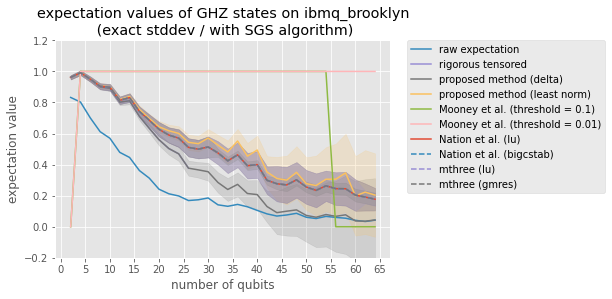

In [9]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, mooney01_length + 2)[::2], 
                           range(2, mooney001_length + 2)[::2], 
                           range(2, max_length + 2)[::2],
                           range(2, nation_bicgstab_length + 2)[::2],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [raw_expvals, 
                           ignis_expvals, 
                           delta_expvals, 
                           lnp_expvals, 
                           mooney01_expvals, 
                           mooney001_expvals, 
                           nation_lu_expvals,
                           nation_bicgstab_expvals,
                           mthree_lu_expvals,
                           mthree_gmres_expvals], 
             stddevs_list = [None, 
                             None, 
                             delta_stddevs, 
                             lnp_stddevs, 
                             None, 
                             None,
                             nation_lu_stddevs,
                             nation_bicgstab_stddevs,
                             mthree_lu_stddevs,
                             mthree_gmres_stddevs], 
             labels = ["raw expectation", 
                       "rigorous tensored", 
                       "proposed method (delta)", 
                       "proposed method (least norm)", 
                       "Mooney et al. (threshold = 0.1)", 
                       "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (lu)",
                       "Nation et al. (bigcstab)",
                       "mthree (lu)",
                       "mthree (gmres)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / with SGS algorithm)")

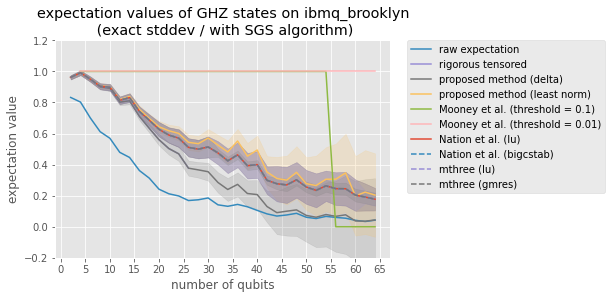

In [11]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, max_length + 2)[::2],
                           range(2, mooney01_length + 2)[::2][1:], 
                           range(2, mooney001_length + 2)[::2][1:], 
                           range(2, max_length + 2)[::2],
                           range(2, nation_bicgstab_length + 2)[::2],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [raw_expvals, 
                           ignis_expvals, 
                           delta_expvals, 
                           lnp_expvals, 
                           mooney01_expvals[1:], 
                           mooney001_expvals[1:], 
                           nation_lu_expvals,
                           nation_bicgstab_expvals,
                           mthree_lu_expvals,
                           mthree_gmres_expvals], 
             stddevs_list = [None, 
                             None, 
                             delta_stddevs, 
                             lnp_stddevs, 
                             None, 
                             None,
                             nation_lu_stddevs,
                             nation_bicgstab_stddevs,
                             mthree_lu_stddevs,
                             mthree_gmres_stddevs], 
             labels = ["raw expectation", 
                       "rigorous tensored", 
                       "proposed method (delta)", 
                       "proposed method (least norm)", 
                       "Mooney et al. (threshold = 0.1)", 
                       "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (lu)",
                       "Nation et al. (bigcstab)",
                       "mthree (lu)",
                       "mthree (gmres)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / with SGS algorithm)")

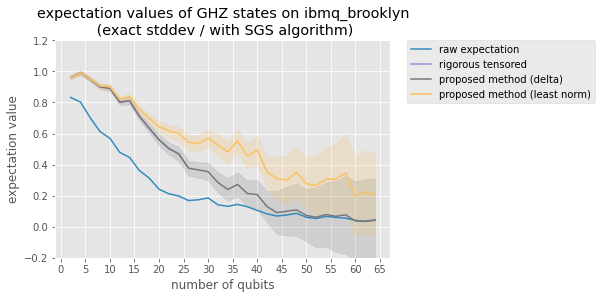

In [12]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           None,
                           None,
                           None,
                           None,
                           None,
                           None,
                          ],
             corrs_list = [raw_expvals, 
                           ignis_expvals, 
                           delta_expvals, 
                           lnp_expvals, 
                           None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           ], 
             stddevs_list = [None,
                             None,
                             delta_stddevs, 
                             lnp_stddevs, 
                             None,
                             None,
                             None,
                             None,
                             None,
                             None,
                            ], 
             labels = ["raw expectation", 
                       "rigorous tensored", 
                       "proposed method (delta)", 
                       "proposed method (least norm)", 
                       None,
                       None,
                       None,
                       None,
                       None,
                       None,
                      ],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / with SGS algorithm)")

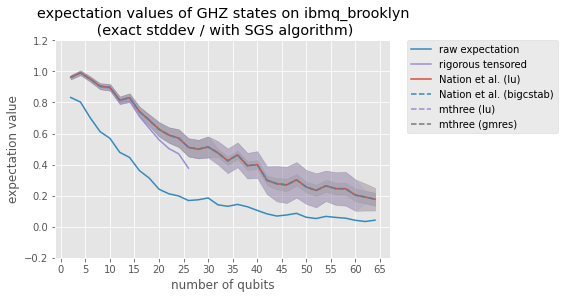

In [13]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           None,
                           None,
                           None,
                           None,
                           range(2, max_length + 2)[::2],
                           range(2, nation_bicgstab_length + 2)[::2],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [raw_expvals, 
                           ignis_expvals, 
                           None,
                           None,
                           None,
                           None,
                           nation_lu_expvals,
                           nation_bicgstab_expvals,
                           mthree_lu_expvals,
                           mthree_gmres_expvals], 
             stddevs_list = [None,
                             None,
                             None,
                             None,
                             None,
                             None,
                             nation_lu_stddevs,
                             nation_bicgstab_stddevs,
                             mthree_lu_stddevs,
                             mthree_gmres_stddevs], 
             labels = ["raw expectation", 
                       "rigorous tensored", 
                       None,
                       None,
                       None,
                       None,
                       "Nation et al. (lu)",
                       "Nation et al. (bigcstab)",
                       "mthree (lu)",
                       "mthree (gmres)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / with SGS algorithm)")

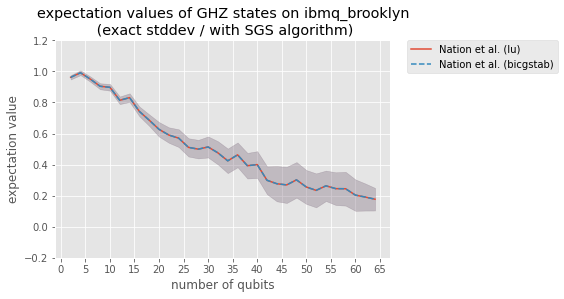

In [14]:
plot_expvals(max_size = max_size, 
             range_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           range(2, max_length + 2)[::2],
                           range(2, nation_bicgstab_length + 2)[::2],
                           None,
                           None,],
             corrs_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           nation_lu_expvals,
                           nation_bicgstab_expvals,
                           None,
                           None,], 
             stddevs_list = [None,
                             None,
                             None,
                             None,
                             None,
                             None,
                             nation_lu_stddevs,
                             nation_bicgstab_stddevs,
                             None,
                             None,], 
             labels = [None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       "Nation et al. (lu)",
                       "Nation et al. (bicgstab)",
                       None,
                       None,],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / with SGS algorithm)")

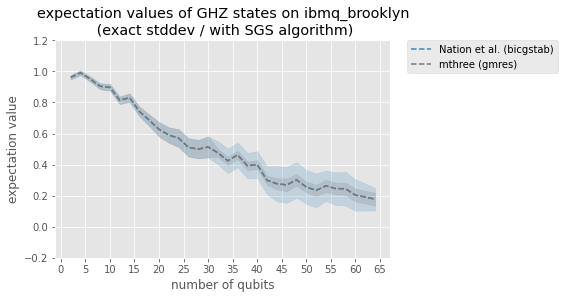

In [15]:
plot_expvals(max_size = max_size, 
             range_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           range(2, nation_bicgstab_length + 2)[::2],
                           None,
                           range(2, max_length + 2)[::2],
                          ],
             corrs_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           nation_bicgstab_expvals,
                           None,
                           mthree_gmres_expvals,
                          ], 
             stddevs_list = [None,
                             None,
                             None,
                             None,
                             None,
                             None,
                             None,
                             nation_bicgstab_stddevs,
                             None,
                             mthree_gmres_stddevs,
                            ], 
             labels = [None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       "Nation et al. (bicgstab)",
                       None,
                       "mthree (gmres)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / with SGS algorithm)")

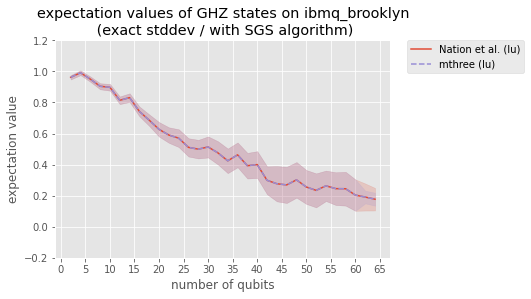

In [16]:
plot_expvals(max_size = max_size, 
             range_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           range(2, max_length + 2)[::2],
                           None,
                           range(2, max_length + 2)[::2],
                           None,],
             corrs_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           nation_lu_expvals,
                           None,
                           mthree_gmres_expvals,
                           None,], 
             stddevs_list = [None,
                             None,
                             None,
                             None,
                             None,
                             None,
                             nation_lu_stddevs,
                             None,
                             mthree_lu_stddevs,
                             None,], 
             labels = [None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       "Nation et al. (lu)",
                       None,
                       "mthree (lu)",
                       None,],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / with SGS algorithm)")

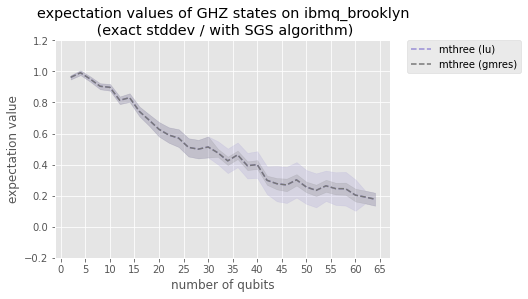

In [17]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, mooney01_length + 2)[::2], 
                           range(2, mooney001_length + 2)[::2], 
                           range(2, max_length + 2)[::2],
                           range(2, nation_bicgstab_length + 2)[::2][1:],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           mthree_lu_expvals,
                           mthree_gmres_expvals], 
             stddevs_list = [None, 
                             None, 
                             None,
                             None,
                             None, 
                             None,
                             None,
                             None,
                             mthree_lu_stddevs,
                             mthree_gmres_stddevs], 
             labels = [None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       "mthree (lu)",
                       "mthree (gmres)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / with SGS algorithm)")

# expval without sgs

In [18]:
ignis_x_hat = [ignis_mitigator_info[i]["x_s"] for i in range(ignis_length)]
delta_x_hat = [delta_mitigator_info[i]["x_hat"] for i in range(max_length)]
lnp_x_hat = [lnp_mitigator_info[i]["x_hat"] for i in range(max_length)]
mooney01_x_hat = [mooney01_mitigator_info[i]["x_s"] for i in range(mooney01_length)]
mooney001_x_hat = [mooney001_mitigator_info[i]["x_s"] for i in range(mooney001_length)]
nation_bicgstab_x_hat = [nation_bicgstab_mitigator_info[i]["x_s"] for i in range(nation_bicgstab_length)]
nation_lu_x_hat = [nation_lu_mitigator_info[i]["x_s"] for i in range(max_length)]

In [19]:
# ignis_indices_to_keys_vector = [[format(j, "0"+str(i+1)+"b") for j in range(2 ** (i+1))] for i in range(ignis_length)]
delta_indices_to_keys_vector = [delta_mitigator_info[i]["indices_to_keys_vector"] for i in range(max_length)]
lnp_indices_to_keys_vector = [lnp_mitigator_info[i]["indices_to_keys_vector"] for i in range(max_length)]
mooney01_indices_to_keys_vector = [mooney01_mitigator_info[i]["indices_to_keys_vector"] for i in range(mooney01_length)]
mooney001_indices_to_keys_vector = [mooney001_mitigator_info[i]["indices_to_keys_vector"] for i in range(mooney001_length)]
nation_bicgstab_indices_to_keys_vector = [nation_bicgstab_mitigator_info[i]["indices_to_keys_vector"] for i in range(nation_bicgstab_length)]
nation_lu_indices_to_keys_vector = [nation_lu_mitigator_info[i]["indices_to_keys_vector"] for i in range(max_length)]

In [20]:
ignis_hist_hat = [dict(zip(ignis_mitigator_info[i]["mitigated_hist"].keys(), ignis_x_hat[i])) for i in range(ignis_length)]
delta_hist_hat = [dict(zip(delta_indices_to_keys_vector[i], delta_x_hat[i])) for i in range(max_length)]
lnp_hist_hat = [dict(zip(lnp_indices_to_keys_vector[i], lnp_x_hat[i])) for i in range(max_length)]
mooney01_hist_hat = [dict(zip(mooney01_indices_to_keys_vector[i], mooney01_x_hat[i])) for i in range(mooney01_length)]
mooney001_hist_hat = [dict(zip(mooney001_indices_to_keys_vector[i], mooney001_x_hat[i])) for i in range(mooney001_length)]
nation_bicgstab_hist_hat = [dict(zip(nation_bicgstab_indices_to_keys_vector[i], nation_bicgstab_x_hat[i])) for i in range(nation_bicgstab_length)]
nation_lu_hist_hat = [dict(zip(nation_lu_indices_to_keys_vector[i], nation_lu_x_hat[i])) for i in range(max_length)]

In [21]:
ignis_expvals_without_sgs = [expval(delta_hist_hat[i]) for i in range(ignis_length)[::2]]
delta_expvals_without_sgs = [expval(delta_hist_hat[i]) for i in range(max_length)[::2]]
lnp_expvals_without_sgs = [expval(lnp_hist_hat[i]) for i in range(max_length)[::2]]
mooney01_expvals_without_sgs = [expval(mooney01_hist_hat[i]) for i in range(mooney01_length)[::2]]
mooney001_expvals_without_sgs = [expval(mooney001_hist_hat[i]) for i in range(mooney001_length)[::2]]
nation_bicgstab_expvals_without_sgs = [expval(nation_bicgstab_hist_hat[i]) for i in range(nation_bicgstab_length)[::2]]
nation_lu_expvals_without_sgs = [expval(nation_lu_hist_hat[i]) for i in range(max_length)[::2]]
mthree_lu_expvals_without_sgs = [mthree_lu_mitigator_info[i]["x_s"].expval() for i in range(max_length)[::2]]
mthree_gmres_expvals_without_sgs = [mthree_gmres_mitigator_info[i]["x_s"].expval() for i in range(max_length)[::2]]

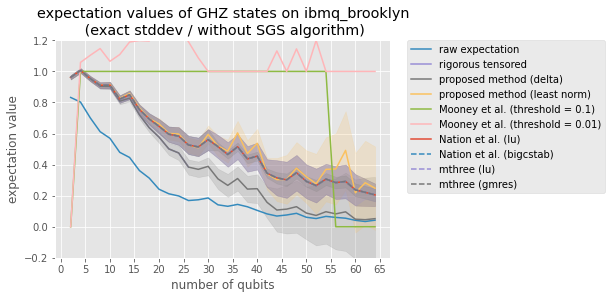

In [22]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, mooney01_length + 2)[::2], 
                           range(2, mooney001_length + 2)[::2], 
                           range(2, max_length + 2)[::2],
                           range(2, nation_bicgstab_length + 2)[::2],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [raw_expvals, 
                           ignis_expvals_without_sgs, 
                           delta_expvals_without_sgs, 
                           lnp_expvals_without_sgs, 
                           mooney01_expvals_without_sgs, 
                           mooney001_expvals_without_sgs, 
                           nation_lu_expvals_without_sgs,
                           nation_bicgstab_expvals_without_sgs,
                           mthree_lu_expvals_without_sgs,
                           mthree_gmres_expvals_without_sgs], 
             stddevs_list = [None, 
                             None, 
                             delta_stddevs, 
                             lnp_stddevs, 
                             None, 
                             None,
                             nation_lu_stddevs,
                             nation_bicgstab_stddevs,
                             mthree_lu_stddevs,
                             mthree_gmres_stddevs], 
             labels = ["raw expectation", 
                       "rigorous tensored", 
                       "proposed method (delta)", 
                       "proposed method (least norm)", 
                       "Mooney et al. (threshold = 0.1)", 
                       "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (lu)",
                       "Nation et al. (bigcstab)",
                       "mthree (lu)",
                       "mthree (gmres)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / without SGS algorithm)")

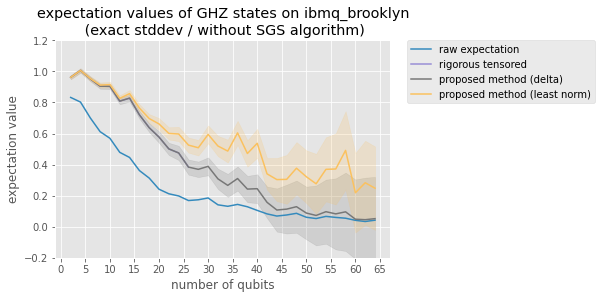

In [23]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           # range(2, mooney01_length + 2)[::2], 
                           # range(2, mooney001_length + 2)[::2], 
                           # range(2, max_length + 2)[::2],
                           # range(2, nation_bicgstab_length + 2)[::2][1:],
                           # range(2, max_length + 2)[::2],
                           # range(2, max_length + 2)[::2],
                          ],
             corrs_list = [raw_expvals, 
                           ignis_expvals_without_sgs, 
                           delta_expvals_without_sgs, 
                           lnp_expvals_without_sgs, 
                           # mooney01_expvals_without_sgs, 
                           # mooney001_expvals_without_sgs, 
                           # nation_lu_expvals_without_sgs,
                           # nation_bicgstab_expvals_without_sgs[1:],
                           # mthree_lu_expvals_without_sgs,
                           # mthree_gmres_expvals_without_sgs,
                          ], 
             stddevs_list = [None, 
                             None, 
                             delta_stddevs, 
                             lnp_stddevs, 
                             # None, 
                             # None,
                             # nation_lu_stddevs,
                             # nation_bicgstab_stddevs[1:],
                             # mthree_lu_stddevs,
                             # mthree_gmres_stddevs,
                            ], 
             labels = ["raw expectation", 
                       "rigorous tensored", 
                       "proposed method (delta)", 
                       "proposed method (least norm)", 
                       # "Mooney et al. (threshold = 0.1)", 
                       # "Mooney et al. (threshold = 0.01)", 
                       # "Nation et al. (lu)",
                       # "Nation et al. (bigcstab)",
                       # "mthree (lu)",
                       # "mthree (gmres)",
                      ],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / without SGS algorithm)")

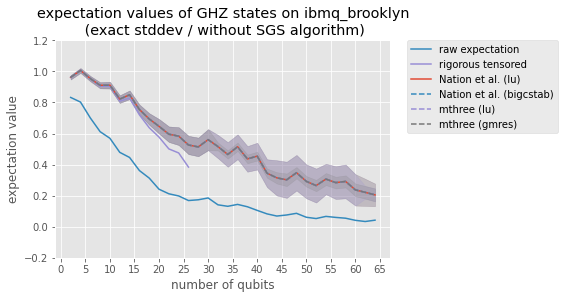

In [42]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           None,
                           None,
                           None,
                           None,
                           range(2, max_length + 2)[::2],
                           range(2, nation_bicgstab_length + 2)[::2],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [raw_expvals, 
                           ignis_expvals_without_sgs, 
                           None,
                           None,
                           None,
                           None,
                           nation_lu_expvals_without_sgs,
                           nation_bicgstab_expvals_without_sgs,
                           mthree_lu_expvals_without_sgs,
                           mthree_gmres_expvals_without_sgs], 
             stddevs_list = [None, 
                             None, 
                             delta_stddevs, 
                             lnp_stddevs, 
                             None, 
                             None,
                             nation_lu_stddevs,
                             nation_bicgstab_stddevs,
                             mthree_lu_stddevs,
                             mthree_gmres_stddevs], 
             labels = ["raw expectation", 
                       "rigorous tensored", 
                       "proposed method (delta)", 
                       "proposed method (least norm)", 
                       "Mooney et al. (threshold = 0.1)", 
                       "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (lu)",
                       "Nation et al. (bigcstab)",
                       "mthree (lu)",
                       "mthree (gmres)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / without SGS algorithm)")

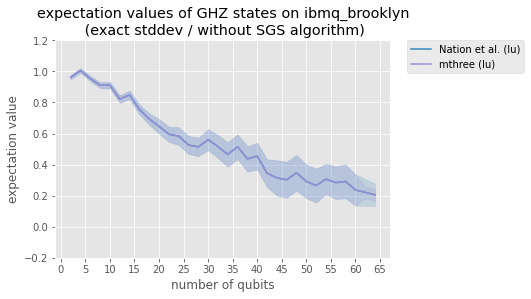

In [25]:
plot_expvals(max_size = max_size, 
             range_list = [# range(2, max_length + 2)[::2], 
                           # range(2, ignis_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, mooney01_length + 2)[::2], 
                           # range(2, mooney001_length + 2)[::2], 
                           range(2, max_length + 2)[::2],
                           # range(2, nation_bicgstab_length + 2)[::2][1:],
                           range(2, max_length + 2)[::2],
                           # range(2, max_length + 2)[::2],
                          ],
             corrs_list = [# raw_expvals, 
                           # ignis_expvals_without_sgs, 
                           # delta_expvals_without_sgs, 
                           # lnp_expvals_without_sgs, 
                           # mooney01_expvals_without_sgs, 
                           # mooney001_expvals_without_sgs, 
                           nation_lu_expvals_without_sgs,
                           # nation_bicgstab_expvals_without_sgs[1:],
                           mthree_lu_expvals_without_sgs,
                           # mthree_gmres_expvals_without_sgs,
                          ], 
             stddevs_list = [# None, 
                             # None, 
                             # delta_stddevs, 
                             # lnp_stddevs, 
                             # None, 
                             # None,
                             nation_lu_stddevs,
                             # nation_bicgstab_stddevs[1:],
                             mthree_lu_stddevs,
                             # mthree_gmres_stddevs,
                            ], 
             labels = [# "raw expectation", 
                       # "rigorous tensored", 
                       # "proposed method (delta)", 
                       # "proposed method (least norm)", 
                       # "Mooney et al. (threshold = 0.1)", 
                       # "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (lu)", 
                       # "Nation et al. (bigcstab)", 
                       "mthree (lu)", 
                       # "mthree (gmres)",
                      ],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / without SGS algorithm)")

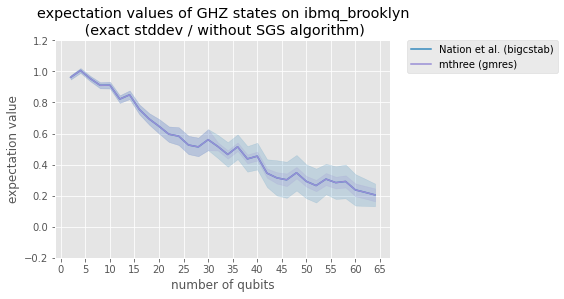

In [26]:
plot_expvals(max_size = max_size, 
             range_list = [# range(2, max_length + 2)[::2], 
                           # range(2, ignis_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, mooney01_length + 2)[::2], 
                           # range(2, mooney001_length + 2)[::2], 
                           # range(2, max_length + 2)[::2],
                           range(2, nation_bicgstab_length + 2)[::2],
                           # range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2],
                          ],
             corrs_list = [# raw_expvals, 
                           # ignis_expvals_without_sgs, 
                           # delta_expvals_without_sgs, 
                           # lnp_expvals_without_sgs, 
                           # mooney01_expvals_without_sgs, 
                           # mooney001_expvals_without_sgs, 
                           # nation_lu_expvals_without_sgs,
                           nation_bicgstab_expvals_without_sgs,
                           # mthree_lu_expvals_without_sgs,
                           mthree_gmres_expvals_without_sgs,
                          ], 
             stddevs_list = [# None, 
                             # None, 
                             # delta_stddevs, 
                             # lnp_stddevs, 
                             # None, 
                             # None,
                             # nation_lu_stddevs,
                             nation_bicgstab_stddevs,
                             # mthree_lu_stddevs,
                             mthree_gmres_stddevs,
                            ], 
             labels = [# "raw expectation", 
                       # "rigorous tensored", 
                       # "proposed method (delta)", 
                       # "proposed method (least norm)", 
                       # "Mooney et al. (threshold = 0.1)", 
                       # "Mooney et al. (threshold = 0.01)", 
                       # "Nation et al. (lu)", 
                       "Nation et al. (bigcstab)", 
                       # "mthree (lu)", 
                       "mthree (gmres)",
                      ],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / without SGS algorithm)")

# changing stddev (bicgstab type)

In [27]:
def stddev(one_norm, shots = 8192):
    return one_norm / np.sqrt(shots)

In [28]:
[mthree_gmres_mitigator_info[i]["x_s"].mitigation_overhead for i in range(max_length)[::2]]

[1.5161198644090526,
 1.8959664022367337,
 2.326990095068763,
 3.0299507333229294,
 3.744462359558296,
 4.819486913373265,
 6.193478121577274,
 7.950215430572069,
 11.113230386723558,
 17.71527259237989,
 20.141147017303307,
 26.596318193134643,
 28.151754616583514,
 29.072991495157694,
 37.361507682657596,
 5.338485791795423,
 5.938411008903946,
 6.067459371316516,
 6.411153121608083,
 6.665166446119697,
 7.111653996278683,
 10.833851400774794,
 13.418323617989708,
 10.9547378142435,
 9.549537376276282,
 10.8566528111632,
 12.333661130215976,
 11.524975168823595,
 12.446858939266464,
 13.72367303991988,
 13.670729234104826,
 14.202072216938642]

In [29]:
[nation_bicgstab_mitigator_info[i]["iterative_one_norm_of_inv_reduced_A"] for i in range(nation_bicgstab_length)[::2]]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999997,
 0.9999999999999996,
 0.9999999999999998,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999993,
 0.9999999999999991,
 0.9999999999999992,
 0.999999999999999,
 1.0000323381985698,
 1.0000830462444563,
 1.000119889036146,
 1.0001508226820477,
 1.000181731162145,
 1.0002597089801053,
 1.0002665650692484,
 1.0006430562358422,
 1.0004258234216654,
 1.0003911039362055,
 1.0004775024779655,
 1.0006857276494314,
 1.0005967586347628,
 1.0006827235273095,
 1.000752282384442,
 1.0007059585781397,
 1.0006862598641573]

In [30]:
[nation_bicgstab_mitigator_info[i]["iterative_one_norm_of_inv_reduced_A"] for i in range(nation_bicgstab_length)[::2]]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999997,
 0.9999999999999996,
 0.9999999999999998,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999993,
 0.9999999999999991,
 0.9999999999999992,
 0.999999999999999,
 1.0000323381985698,
 1.0000830462444563,
 1.000119889036146,
 1.0001508226820477,
 1.000181731162145,
 1.0002597089801053,
 1.0002665650692484,
 1.0006430562358422,
 1.0004258234216654,
 1.0003911039362055,
 1.0004775024779655,
 1.0006857276494314,
 1.0005967586347628,
 1.0006827235273095,
 1.000752282384442,
 1.0007059585781397,
 1.0006862598641573]

In [31]:
nation_bicgstab_stddevs_bicgstab = [stddev(nation_bicgstab_mitigator_info[i]["iterative_one_norm_of_inv_reduced_A"]) for i in range(nation_bicgstab_length)[::2]]
nation_lu_stddevs_bicgstab = [stddev(nation_bicgstab_mitigator_info[i]["iterative_one_norm_of_inv_reduced_A"]) for i in range(nation_bicgstab_length)[::2]]

In [32]:
nation_bicgstab_stddevs_lu = [stddev(nation_lu_mitigator_info[i]["iterative_one_norm_of_inv_reduced_A"]) for i in range(nation_bicgstab_length)[::2]]
nation_lu_stddevs_lu = [stddev(nation_lu_mitigator_info[i]["iterative_one_norm_of_inv_reduced_A"]) for i in range(max_length)[::2]]

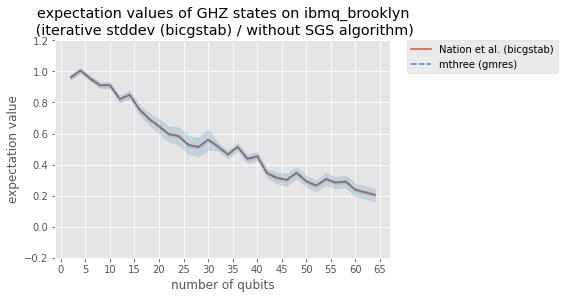

In [33]:
plot_expvals(max_size = max_size, 
             range_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           # range(2, max_length + 2)[::2][:17],
                           range(2, nation_bicgstab_length + 2)[::2],
                           # range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2],
                          ],
             corrs_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           # nation_lu_expvals_without_sgs[:17],
                           nation_bicgstab_expvals_without_sgs,
                           # mthree_lu_expvals_without_sgs,
                           mthree_gmres_expvals_without_sgs,
                          ], 
             stddevs_list = [None,
                             None,
                             None,
                             None,
                             None,
                             None,
                             # nation_lu_stddevs_bicgstab[1:],
                             nation_bicgstab_stddevs_bicgstab,
                             # mthree_lu_stddevs,
                             mthree_gmres_stddevs,
                            ], 
             labels = [None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       # "Nation et al. (lu)",
                       "Nation et al. (bicgstab)",
                       # "mthree (lu)",
                       "mthree (gmres)",
                      ],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (iterative stddev (bicgstab) / without SGS algorithm)")

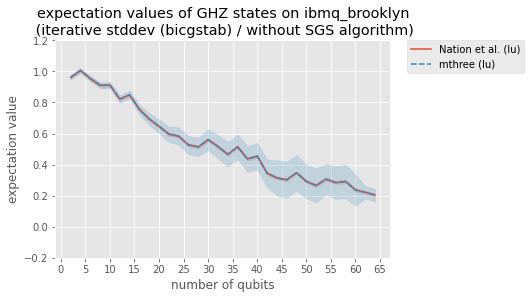

In [34]:
plot_expvals(max_size = max_size, 
             range_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           range(2, max_length + 2)[::2],
                           # range(2, nation_bicgstab_length + 2)[::2][1:],
                           range(2, max_length + 2)[::2],
                           # range(2, max_length + 2)[::2],
                          ],
             corrs_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           nation_lu_expvals_without_sgs,
                           # nation_bicgstab_expvals_without_sgs[1:],
                           mthree_lu_expvals_without_sgs,
                           # mthree_gmres_expvals_without_sgs,
                          ], 
             stddevs_list = [None,
                             None,
                             None,
                             None,
                             None,
                             None,
                             nation_lu_stddevs_bicgstab,
                             # nation_bicgstab_stddevs_bicgstab[1:],
                             mthree_lu_stddevs,
                             # mthree_gmres_stddevs,
                            ], 
             labels = [None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       "Nation et al. (lu)",
                       # "Nation et al. (bicgstab)",
                       "mthree (lu)",
                       # "mthree (gmres)",
                      ],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (iterative stddev (bicgstab) / without SGS algorithm)")

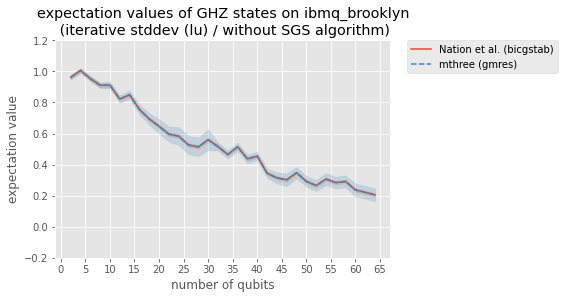

In [35]:
plot_expvals(max_size = max_size, 
             range_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           # range(2, max_length + 2)[::2][:17],
                           range(2, nation_bicgstab_length + 2)[::2],
                           # range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2],
                          ],
             corrs_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           # nation_lu_expvals_without_sgs[:17],
                           nation_bicgstab_expvals_without_sgs,
                           # mthree_lu_expvals_without_sgs,
                           mthree_gmres_expvals_without_sgs,
                          ], 
             stddevs_list = [None,
                             None,
                             None,
                             None,
                             None,
                             None,
                             # nation_lu_stddevs_lu[1:],
                             nation_bicgstab_stddevs_lu,
                             # mthree_lu_stddevs,
                             mthree_gmres_stddevs,
                            ], 
             labels = [None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       # "Nation et al. (lu)",
                       "Nation et al. (bicgstab)",
                       # "mthree (lu)",
                       "mthree (gmres)",
                      ],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (iterative stddev (lu) / without SGS algorithm)")

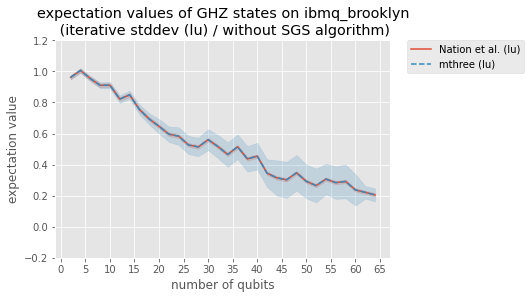

In [36]:
plot_expvals(max_size = max_size, 
             range_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           range(2, max_length + 2)[::2],
                           # range(2, nation_bicgstab_length + 2)[::2][1:],
                           range(2, max_length + 2)[::2],
                           # range(2, max_length + 2)[::2],
                          ],
             corrs_list = [None,
                           None,
                           None,
                           None,
                           None,
                           None,
                           nation_lu_expvals_without_sgs,
                           # nation_bicgstab_expvals_without_sgs[1:],
                           mthree_lu_expvals_without_sgs,
                           # mthree_gmres_expvals_without_sgs,
                          ], 
             stddevs_list = [None,
                             None,
                             None,
                             None,
                             None,
                             None,
                             nation_lu_stddevs_lu,
                             # nation_bicgstab_stddevs_lu[1:],
                             mthree_lu_stddevs,
                             # mthree_gmres_stddevs,
                            ], 
             labels = [None,
                       None,
                       None,
                       None,
                       None,
                       None,
                       "Nation et al. (lu)",
                       # "Nation et al. (bicgstab)",
                       "mthree (lu)",
                       # "mthree (gmres)",
                      ],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (iterative stddev (lu) / without SGS algorithm)")